# Выводы
#### Продукты Red используют больше 77% выборки
#### Компания Red единственная не работает с товарами. Видимо Red занимается только цифровыми проектами
#### Почти 90% компании Red установили ПК версию приложения
#### 99% пользователей компании Blue, у которых установлено приложение на какой либо из платформ НИЧЕГО не купили (их GMV = 0)
#### 96% пользователей с аккаунтом Blue НИЧЕГО у этой компании не покупали (GMV = 0)
#### total GMV у Blue находится в диапазоне от 0 до 30000, медиана примерно 160 (среди ненулевых GMV)
#### в Москве готовы платить больше почти в 2 раза (медиана среди тех, кто тратится)
#### У Green очень небольшая аудитория, но почти у половины ненулевой GMV
#### Компания Green заработала около 6 млн при очень небольшой аудитории (по сравнению с Black и Blue), Blue заработала всего 200 тыс при самой большой аудитории среди этих трех компаний, а Black находится где-то посредине, ведь у неё самый высокий GMV (9.5 млн) при "средней" аудитории

In [1]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(context='notebook', style='whitegrid', palette='deep', 
        font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [65]:
data = pd.read_excel('Analytic_test.xlsx', header=1, index_col=1)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,Black_gvm_order_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
HID,,,,,,,,,,,,,,,,,,,,,
00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
data.columns

Index(['active_Red', 'has_Green_id', 'has_Black_id', 'has_Blue_id',
       'Blue_activity_count', 'Blue_gmv_total', 'Green_gvm_total',
       'Green_gvm_order_count', 'Black_gvm_total', 'Black_gvm_order_count',
       'Red_android', 'Green_android', 'Black_android', 'Blue_android',
       'Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple', 'is_msk',
       'Red_web', 'Green_web', 'Black_web', 'Blue_web'],
      dtype='object')

In [68]:
data['total_gmv'] = data[f'Blue_gmv_total']+data[f'Green_gvm_total']+data[f'Black_gvm_total']

In [69]:
for color in ['Red', 'Green', 'Blue', 'Black']:
    data[f'{color}_any_device'] = data[f'{color}_apple']+data[f'{color}_android']+data[f'{color}_web']
    data[f'{color}_any_device'] = data[f'{color}_any_device'].apply(lambda x: 1 if x > 0 else 0)

In [70]:
for device in ['android', 'apple', 'web']:
    data[f'use_{device}'] = list(map(lambda x: 1 if x else 0, data[f'Red_{device}']+data[f'Green_{device}']+data[f'Blue_{device}']+data[f'Black_{device}']))

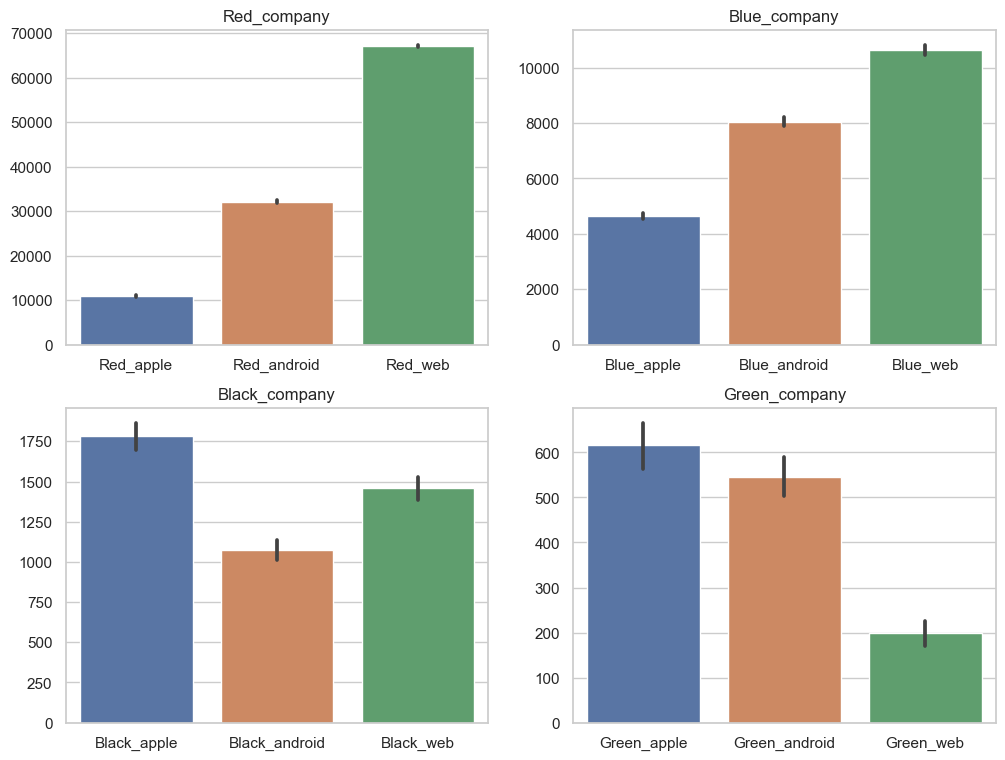

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

color = 'Red'
sns.barplot(ax=axs[0][0], data=data[[f'{color}_apple', f'{color}_android', f'{color}_web']], estimator=np.sum)
axs[0][0].set_title(f'{color}_company')

color = 'Blue'
sns.barplot(ax=axs[0][1], data=data[[f'{color}_apple', f'{color}_android', f'{color}_web']], estimator=np.sum)
axs[0][1].set_title(f'{color}_company')

color = 'Black'
sns.barplot(ax=axs[1][0], data=data[[f'{color}_apple', f'{color}_android', f'{color}_web']], estimator=np.sum)
axs[1][0].set_title(f'{color}_company')

color = 'Green'
sns.barplot(ax=axs[1][1], data=data[[f'{color}_apple', f'{color}_android', f'{color}_web']], estimator=np.sum)
axs[1][1].set_title(f'{color}_company')


plt.show()

In [72]:
Red_device = pd.Series(map(lambda x: 1 if x else 0, data[f'Red_apple']+data[f'Red_android']+data[f'Red_web'])) 
print(f'Продуктами компании Red пользуются {sum(Red_device)} человек (это приблизительно {round(sum(Red_device)*100/len(data), 1)}\
% от всей выборки), из которых:',
      f'\n{round(sum(data["Red_web"])/sum(Red_device)*100, 1)}% усталовили приложение на ПК',
      f'\n{round(sum(data["Red_android"])/sum(Red_device)*100, 1)}% усталовили приложение на android',
      f'\n{round(sum(data["Red_apple"])/sum(Red_device)*100, 1)}% усталовили приложение на apple')

Продуктами компании Red пользуются 77565 человек (это приблизительно 77.6% от всей выборки), из которых: 
86.5% усталовили приложение на ПК 
41.4% усталовили приложение на android 
14.0% усталовили приложение на apple


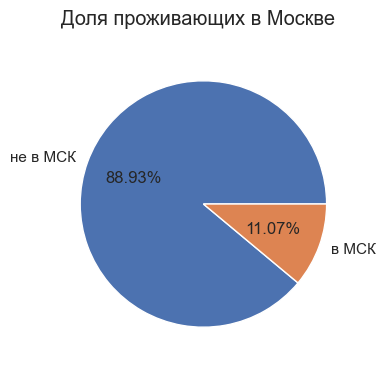

In [73]:
x = data[data['Black_any_device'] == 0].groupby('is_msk').apply(len)
plt.figure(figsize=(4, 4))
plt.pie(x=x, labels=['в МСК' if i else 'не в МСК' for i in x.index], autopct='%0.2f%%')
plt.suptitle('Доля проживающих в Москве')
plt.show() # Как можно увидеть, дисбаланс целевого признака (различие в 3 раза)

In [74]:
print('Доля тех, у кого установлено какое-либо приложение компании Blue, но кто ничего не покупал')
len(data[(data['Blue_any_device'] == 1) & (data['Blue_gmv_total'] == 0)])/sum(data['Blue_any_device'])

Доля тех, у кого установлено какое-либо приложение компании Blue, но кто ничего не покупал


0.9863350513026621

In [75]:
print('Доля тех, у кого есть хотя бы одна подписка компании Blue, но кто ничего не покупал')
len(data[(data['has_Blue_id'] > 0) & (data['Blue_gmv_total'] == 0)])/len(data[(data['has_Blue_id'] > 0)])

Доля тех, у кого есть хотя бы одна подписка компании Blue, но кто ничего не покупал


0.9659279360771899

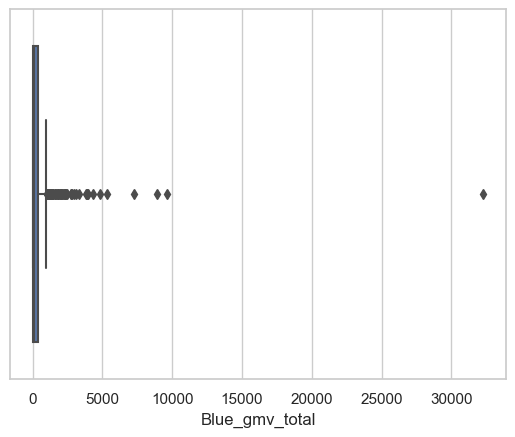

In [76]:
sns.boxplot(data[data['Blue_gmv_total'] > 0]['Blue_gmv_total'])
plt.show()

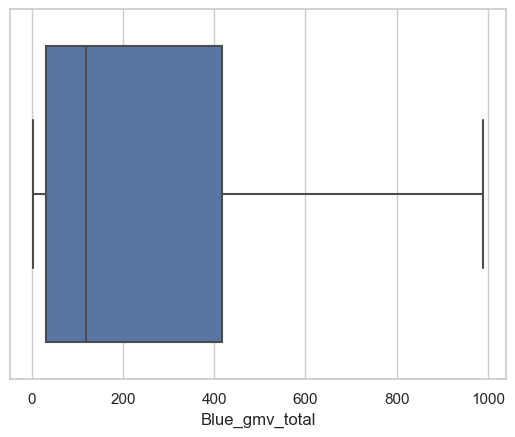

In [77]:
sns.boxplot(data[data['Blue_gmv_total'] > 0]['Blue_gmv_total'], showfliers=False)
plt.show()

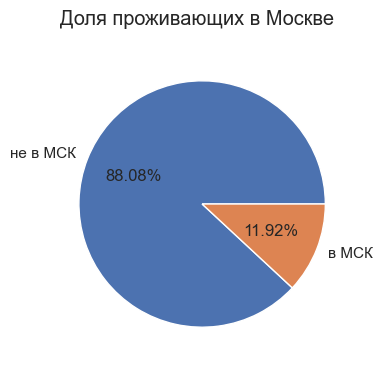

In [78]:
x = data.groupby('is_msk').apply(len)
plt.figure(figsize=(4, 4))
plt.pie(x=x, labels=['в МСК' if i else 'не в МСК' for i in x.index], autopct='%0.2f%%')
plt.suptitle('Доля проживающих в Москве')
plt.show() # Как можно увидеть, дисбаланс целевого признака (различие в 3 раза)

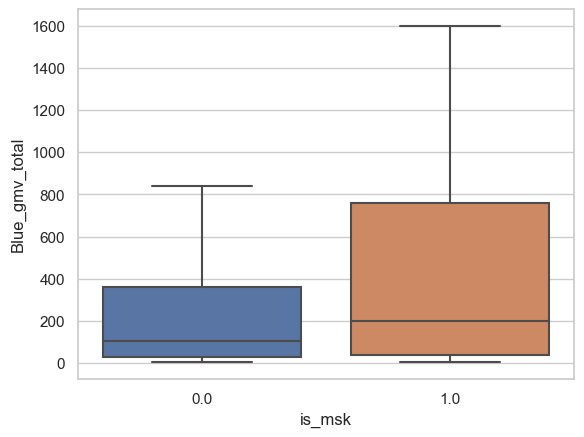

In [79]:

sns.boxplot(x='is_msk', y='Blue_gmv_total', data=data[(data['Blue_gmv_total'] > 0)], showfliers=False)
plt.show()

In [80]:
len(data[((data['Green_any_device'] == 1) | (data['has_Green_id'] == 1)) & (data['Green_gvm_total'] > 0)]) /\
len(data[((data['Green_any_device'] == 1) | (data['has_Green_id'] == 1))])

0.49580302182428654

In [81]:
len(data[((data['Blue_any_device'] == 1) | (data['has_Blue_id'] == 1)) & (data['Blue_gmv_total'] > 0)]) /\
len(data[((data['Blue_any_device'] == 1) | (data['has_Blue_id'] == 1))])

0.016099205917545958

In [82]:
len(data[((data['Black_any_device'] == 1) | (data['has_Black_id'] == 1)) & (data['Black_gvm_total'] > 0)]) /\
len(data[((data['Black_any_device'] == 1) | (data['has_Black_id'] == 1))])

0.23928015996445234

In [83]:
# sum(data['Blue_gmv_total'])
data['Blue_gmv_total'].unique()

array([0.0000e+00, 2.0000e+02, 7.5200e+02, 1.3600e+02, 1.9800e+02,
       9.2400e+02, 4.4000e+01, 8.4000e+01, 4.2000e+01, 2.9000e+02,
       1.2000e+01, 4.0000e+02, 2.2000e+01, 5.0000e+01, 1.9600e+02,
       1.0600e+02, 9.0000e+01, 4.0000e+00, 7.8800e+02, 1.2080e+03,
       1.6200e+02, 3.4600e+02, 9.8000e+01, 2.7200e+02, 5.8000e+02,
       6.2000e+02, 7.4000e+01, 3.6400e+02, 4.0800e+02, 2.8800e+02,
       6.2600e+02, 1.4000e+01, 4.8000e+01, 2.0000e+00, 1.0580e+03,
       1.3400e+02, 3.1200e+02, 1.8000e+01, 3.4000e+01, 5.3600e+02,
       3.8000e+01, 2.0600e+02, 3.7800e+02, 1.1400e+02, 1.7000e+02,
       6.0000e+01, 8.2400e+02, 3.5200e+02, 1.2400e+02, 3.6000e+01,
       3.6800e+02, 1.9000e+02, 6.6000e+01, 5.0600e+02, 3.8000e+02,
       1.0680e+03, 9.6120e+03, 2.7000e+02, 9.6000e+01, 2.4000e+01,
       1.1200e+02, 6.4600e+02, 1.3800e+02, 1.0780e+03, 2.3200e+02,
       2.0260e+03, 2.3480e+03, 3.8400e+02, 2.5800e+02, 1.3000e+02,
       6.0000e+02, 1.8800e+02, 8.0000e+02, 3.5600e+02, 4.8380e

In [84]:
sum(data['Black_gvm_total'])

9487308.0

In [90]:
sum(data[data['Blue_gmv_total'].notna()]['Blue_gmv_total'])

246114.0

In [92]:
sum(data[data['Green_gvm_total'].notna()]['Green_gvm_total'])

5993420.0